# Bitcoin Price Prediction Using Recurrent Neural Networks and LSTM

## Index


1. Introduction
2. Understanding Biticoin
3. Technologies used 
4. Getting real-time cryptocurrency data (biticoin)
5. Prepare data for training and test
6. Predict the price of cyptocurrency using LSTM neural network (deep learning)
7. Test Dataset and conclusion 






### Introdução 
Recurrent neural networks (RNN) are the state-of-the-art algorithm for sequential data and are used by Apple's Siri and Google's voice search. It is an algorithm that remembers its input due to its internal memory, which makes the algorithm perfectly suited for solving machine learning problems involving sequential data. It is one of the algorithms that has great results in deep learning. In this article it is discussed how to predict the price of Bitcoin by analyzing the information of the last 6 years.  We implemented a simple model that helps us better understand how time series works using Python and RNNs.



## Understanding Biticoin 

Bitcoin is a cryptocurrency that was created in January 2009. It is the world's most valuable cryptocurrency and is traded on over 40 exchanges around the world, accepting over 30 different currencies. As a currency, Bitcoin offers a new opportunity for price forecasting as it has a high volatility, which is much higher compared to traditional currencies. 

The biticoin system is a set of decentralized nodes that run the bitcoin code and store its blockchain [blockchain](https://www.investopedia.com/terms/b/blockchain.asp).  Metaphorically, a blockchain can be considered a collection of blocks. In each block there is a collection of transactions.  Because all the computers running the blockchain has the same list of blocks and transactions, and can transparently see these new blocks being filled with new bitcoin transactions, no one can cheat the system.

Bitcoin uses peer-to-peer [peer-to-peer](https://www.investopedia.com/terms/b/blockchain.asp) technology to facilitate instant payments. Miners are responsible for processing transactions on the blockchain and are driven by repo fees. 

The way bitcoin works is key to understanding why it is so popular. Unlike other investments, cryptocurrency is not tied to physical assets or the US dollar. Its primary purpose is to allow two people anywhere to exchange value directly. What this means is that there is no centralized controlling this network. There is no government, no central bank that can shut down or arbitrarily raise or lower the value. 

It will be interesting to see to which degree central banks start to digitize their own currencies. As financial systems become more digital, it's leading to bitcoin more mainstream, but the digital currency's resurgence is also closely tied to the state of global finance.

Every time someone makes a transaction, a unique encrypted signature is added to the ledger for verification


## Technologies used 


**1. Recurrent Neural Networks**

RNNs are a robust and powerful type of neural network, and are considered one of the most professional algorithms because they are the only ones with an internal memory. 

Recurrent neural networks were first created in the 1980s, but only in recent years has its true potential been realized. The increase in its computational power, along with the gigantic amounts of data we now have to work with, and the invention of short-term memory (LSTM) in the 1990s, has really brought RNNs to the fore. 

The algorithm performs very well for sequential data such as time series, speech, text, financial data, audio, video, weather and more. RNNs is able to form a much deeper understanding of a sequence and its context compared to other algorithms.  

In an RNN, information goes through a cycle. When making a decision, it considers the current input and also what it has learned from the inputs it has received previously. 

The image below illustrates how the flow of information works in the RNN algorithm

![RNN](RNNs.png)


**2.Long Dhort-Term Memory (LSTM).**

Long short-term memory networks are an extension for recurrent neural networks, which basically extends the memory. Therefore it is well suited to learn from important experiences that have very long time lags in between.

LSTMs enable RNNs to remember inputs over a long period of time. This is because LSTMs contain information in a memory, much like the memory of a computer. The LSTM can read, write and delete information from its memory.

In an LSTM you have three gates: input, forget and output gate. These gates determine whether or not to let new input in (input gate), delete the information because it isn’t important (forget gate), or let it impact the output at the current timestep (output gate). Below is an illustration of a RNN with its three gates:

![LSTM](LSTM.png)

The gates in an LSTM are analog in the form of sigmoids, meaning they range from zero to one. The fact that they are analog enables them to do backpropagation.

### Libraries

In [219]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

###  4. Getting real-time cryptocurrency data (biticoin)

The data is collected the current data for Bitcoin from [Yahoo Finance](https://in.finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD&guce_referrer=aHR0cHM6Ly9naXRodWIuY29tL3N1cmFqYmFoYWR1cjU5MS9CaXRjb2luLVByaWNlLVByZWRpY3Rpb24tVXNpbmctUk5OLS0tTFNUTQ&guce_referrer_sig=AQAAAHL6O0g7rnrvKBzzqIlA6B4fdHCk0Vp_mdcZPKO9V7W9d0d6cMkBLA1DxSSlcvb49Oq_m9nOh9y-Ay6s73nEk31hxma615IMw9okiq3sqeK9L9rUxlqvPMrhvOjARP7X96ckdYbjO0HzbsPe9VXZXn4YqkOZe-dkS-dia7qDMB-3&guccounter=2)

In [220]:
data = pd.read_csv('BTC-USD.csv', date_parser = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2075,2020-05-23,9185.062500,9302.501953,9118.108398,9209.287109,9209.287109,2.772787e+10
2076,2020-05-24,9212.283203,9288.404297,8787.250977,8790.368164,8790.368164,3.251880e+10
2077,2020-05-25,8786.107422,8951.005859,8719.667969,8906.934570,8906.934570,3.128816e+10
2078,2020-05-26,NaN,NaN,NaN,NaN,NaN,NaN
2079,2020-05-27,8834.157227,8859.578125,8834.157227,8856.885742,8856.885742,2.914432e+10


In [221]:
data_training = data[data['Date']< '2020-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
1927,2019-12-27,7238.141113,7363.529297,7189.934082,7290.088379,7290.088379,2.277736e+10
1928,2019-12-28,7289.031250,7399.041016,7286.905273,7317.990234,7317.990234,2.136567e+10
1929,2019-12-29,7317.647461,7513.948242,7279.865234,7422.652832,7422.652832,2.244526e+10
1930,2019-12-30,7420.272949,7454.824219,7276.308105,7292.995117,7292.995117,2.287413e+10


In [222]:
data_test = data[data['Date']> '2020-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
1933,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,2.080208e+10
1934,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,2.811148e+10
1935,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,1.844427e+10
1936,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,1.972507e+10
1937,2020-01-06,7410.452148,7781.867188,7409.292969,7769.219238,7769.219238,2.327626e+10
...,...,...,...,...,...,...,...
2075,2020-05-23,9185.062500,9302.501953,9118.108398,9209.287109,9209.287109,2.772787e+10
2076,2020-05-24,9212.283203,9288.404297,8787.250977,8790.368164,8790.368164,3.251880e+10
2077,2020-05-25,8786.107422,8951.005859,8719.667969,8906.934570,8906.934570,3.128816e+10
2078,2020-05-26,NaN,NaN,NaN,NaN,NaN,NaN


In [223]:
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,465.864014,468.174011,452.421997,457.334015,21056800.0
1,456.859985,456.859985,413.104004,424.440002,34483200.0
2,424.102997,427.834991,384.532013,394.795990,37919700.0
3,394.673004,423.295990,389.882996,408.903992,36863600.0
4,408.084991,412.425995,393.181000,398.821014,26580100.0


### Normalization

The first step we will take to our data is to normalize its values. The goal of normalization is to change the values of numeric columns in the data set to a common scale, without distorting differences in the ranges of values.

MinMaxScaler is used to normalize the data 


In [224]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[1.49732345e-02, 1.29013200e-02, 1.49400698e-02, 1.44534769e-02,
        3.35749244e-04],
       [1.45066780e-02, 1.23321258e-02, 1.28489753e-02, 1.27508263e-02,
        6.33453324e-04],
       [1.28093283e-02, 1.08719155e-02, 1.13293978e-02, 1.12164013e-02,
        7.09650970e-04],
       ...,
       [3.70008086e-01, 3.67365217e-01, 3.78051927e-01, 3.74990337e-01,
        4.97548412e-01],
       [3.75325771e-01, 3.64390763e-01, 3.77862744e-01, 3.68279031e-01,
        5.07057851e-01],
       [3.68805505e-01, 3.58377151e-01, 3.72197021e-01, 3.63134123e-01,
        4.69226533e-01]])

In [225]:
X_train = []
Y_train = []

In [226]:
training_data.shape[0]

1932

In [227]:
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i,0])

In [228]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [229]:
X_train.shape

(1872, 60, 5)

### Predict the price of cyptocurrency using LSTM neural network (deep learning)

This is the model building stage. Finding the right model is an art, and it will take several tweaks and attempts to find the right layers and hyperparameters for each one. 

The model built is quite simple and standard for this type of problem. 

Training this model is something you can do even without a GPU, the amount of data is very low and the network architecture is very simple. When it comes to more advanced models with more granular information, it can take hours or days to train. 

In [230]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [231]:
#Initialize the RNN
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2))

In [232]:
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units =1))

In [233]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 60, 50)            11200     
_________________________________________________________________
dropout_28 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 60, 60)            26640     
_________________________________________________________________
dropout_29 (Dropout)         (None, 60, 60)            0         
_________________________________________________________________
lstm_30 (LSTM)               (None, 60, 80)            45120     
_________________________________________________________________
dropout_30 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_31 (LSTM)               (None, 120)              

In [234]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [235]:
history= regressor.fit(X_train, Y_train, epochs = 20, batch_size =50, validation_split=0.1)

Epoch 1/20
34/34 [==============================] - 11s 165ms/step - loss: 0.0011 - val_loss: 0.0024
Epoch 2/20
34/34 [==============================] - 5s 144ms/step - loss: 9.5208e-04 - val_loss: 0.0020
Epoch 3/20
34/34 [==============================] - 5s 144ms/step - loss: 0.0012 - val_loss: 0.0023
Epoch 4/20
34/34 [==============================] - 5s 144ms/step - loss: 0.0012 - val_loss: 0.0037
Epoch 5/20
34/34 [==============================] - 5s 146ms/step - loss: 0.0011 - val_loss: 0.0023
Epoch 6/20
34/34 [==============================] - 5s 145ms/step - loss: 0.0011 - val_loss: 0.0044
Epoch 7/20
34/34 [==============================] - 5s 145ms/step - loss: 0.0013 - val_loss: 0.0028
Epoch 8/20
34/34 [==============================] - 5s 144ms/step - loss: 9.9998e-04 - val_loss: 0.0012
Epoch 9/20
34/34 [==============================] - 5s 145ms/step - loss: 9.0803e-04 - val_loss: 0.0016
Epoch 10/20
34/34 [==============================] - 5s 146ms/step - loss: 0.0010 - val

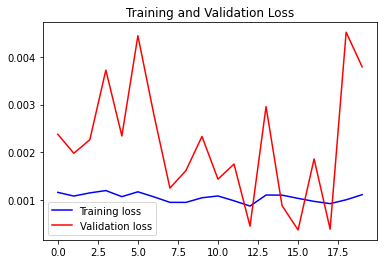

In [236]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

 # Test Dataset

In [237]:
part_60_days = data_training.tail(60)
df= part_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,9259.783203,9377.486328,9249.587891,9324.717773,2.124268e+10
1,9324.787109,9379.806641,9141.251953,9235.354492,2.113222e+10
2,9235.607422,9505.051758,9191.485352,9412.612305,2.617026e+10
3,9413.004883,9457.417969,9256.931641,9342.527344,2.619861e+10
4,9340.864258,9423.237305,9305.909180,9360.879883,2.313390e+10


In [238]:
inputs = scaler.transform(df)
inputs

array([[0.4706426 , 0.46111744, 0.48280998, 0.47344448, 0.47088353],
       [0.47401087, 0.46123417, 0.47704822, 0.46881889, 0.4684344 ],
       [0.4693899 , 0.46753509, 0.47971984, 0.47799406, 0.58014293],
       ...,
       [0.44609842, 0.43966175, 0.45462663, 0.45181931, 0.69362236],
       [       nan,        nan,        nan,        nan,        nan],
       [0.44858819, 0.43506214, 0.46071565, 0.44922869, 0.64608693]])

In [239]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])

In [240]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape

((147, 60, 5), (147,))

In [241]:
Y_pred = regressor.predict(X_test)
Y_pred, Y_test

(array([[0.31573394],
        [0.31356454],
        [0.31493753],
        [0.314973  ],
        [0.3152351 ],
        [0.3206489 ],
        [0.33623117],
        [0.35058284],
        [0.35275668],
        [0.35030577],
        [0.3462549 ],
        [0.34243864],
        [0.3410369 ],
        [0.3706981 ],
        [0.3878135 ],
        [0.38893002],
        [0.38443133],
        [0.37846985],
        [0.37408176],
        [0.36836624],
        [0.3632006 ],
        [0.36079416],
        [0.36223623],
        [0.3632661 ],
        [0.36138207],
        [0.3629621 ],
        [0.37690234],
        [0.3981341 ],
        [0.40653884],
        [0.40762517],
        [0.4030096 ],
        [0.3962582 ],
        [0.39555597],
        [0.39714473],
        [0.39586607],
        [0.40009865],
        [0.4078148 ],
        [0.41022235],
        [0.41050962],
        [0.41331285],
        [0.4175685 ],
        [0.41919705],
        [0.42600155],
        [0.43434063],
        [0.43372673],
        [0

In [242]:
scaler.scale_

array([5.18164146e-05, 5.03087220e-05, 5.31841635e-05, 5.17617168e-05,
       2.21730382e-11])

In [243]:
scale = 1/5.18164146e-05
scale

19298.903787912797

In [244]:
Y_test = Y_test*scale
Y_pred = Y_pred*scale

In [245]:
Y_pred


array([[6093.319 ],
       [6051.452 ],
       [6077.949 ],
       [6078.634 ],
       [6083.6924],
       [6188.1724],
       [6488.893 ],
       [6765.8647],
       [6807.8174],
       [6760.5176],
       [6682.34  ],
       [6608.6904],
       [6581.638 ],
       [7154.067 ],
       [7484.376 ],
       [7505.9233],
       [7419.1035],
       [7304.0537],
       [7219.368 ],
       [7109.065 ],
       [7009.3735],
       [6962.932 ],
       [6990.762 ],
       [7010.6377],
       [6974.278 ],
       [7004.771 ],
       [7273.8022],
       [7683.5522],
       [7845.7544],
       [7866.719 ],
       [7777.6436],
       [7647.349 ],
       [7633.797 ],
       [7664.458 ],
       [7639.7812],
       [7721.466 ],
       [7870.379 ],
       [7916.842 ],
       [7922.3857],
       [7976.4854],
       [8058.6147],
       [8090.044 ],
       [8221.363 ],
       [8382.298 ],
       [8370.45  ],
       [8278.6   ],
       [8162.334 ],
       [8078.3525],
       [8069.7417],
       [8069.3667],


In [246]:
Y_test

array([ 7025.65427061,  6807.5317115 ,  7168.47848868,  7233.55466072,
        7233.55514872,  7591.7851299 ,  7985.0385481 ,  7905.39889906,
        7701.41061796,  7985.2939191 ,  7856.36472004,  8012.87497412,
        7964.03610609,  8648.44675144,  8635.58444644,  8548.31296239,
        8750.31491549,  8764.5483145 ,  8527.73483738,  8482.09421236,
        8567.3139394 ,  8503.75339237,  8228.67038423,  8263.22214224,
        8187.51315721,  8420.41159533,  8735.62741549,  9180.57370472,
        9139.11960369,  9331.41647879,  9169.46042371,  9212.92331473,
        9167.78659571,  9115.94479868,  9006.51901763,  9440.92429085,
        9549.1059319 ,  9616.17331494,  9686.99753298,  9938.6625721 ,
        9678.99460397, 10025.49069715, 10147.06394021, 10034.65378315,
       10136.95944721,  9712.28268999,  9759.66354901,  9514.33347089,
        9966.90183012,  9452.42819686,  9434.88522885,  9510.81003289,
        9486.42136087,  9744.68601001,  9474.41550187,  9161.39304071,
      

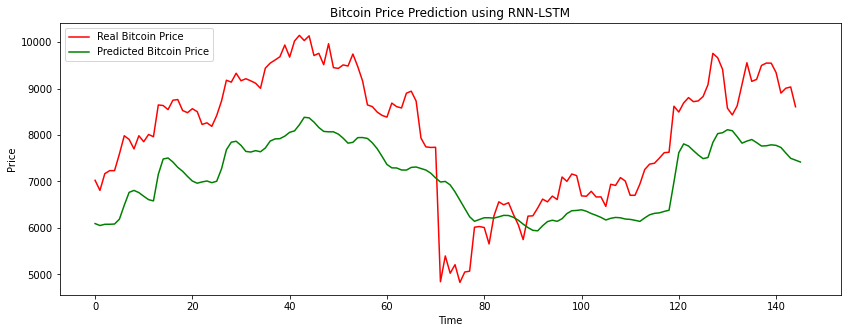

In [247]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## Conclusion

RNNs and LSTM are excellent technologies and have great architectures that can be used to analyze and predict time series information. The focus of the article was to implement a simple model, if you are interested in the subject, try different things and want to play with hyperparameters and layers, here is the github link. 